In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

## Error Visible Calculation

In [2]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [3]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')
X = train_features.to_numpy()
Y = train_labels.to_numpy()
test_X = test_features.to_numpy()
test_Y = test_labels.to_numpy()
input_shape = (18,)

# MLP

In [44]:
model = Sequential()
model.add(BatchNormalization(input_dim=X.shape[1]))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 18)                72        
_________________________________________________________________
dense_42 (Dense)             (None, 100)               1900      
_________________________________________________________________
dense_43 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_44 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 8,568
Trainable params: 8,532
Non-trainable params: 36
__________________________________________________

In [50]:
opt = keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='MSE', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X, Y, epochs=200, batch_size=10000, verbose=2, validation_split=0.1,callbacks=[early_stopping])
model.summary()

Epoch 1/200
36/36 - 0s - loss: 1470.5254 - mean_squared_error: 1470.5254 - val_loss: 1380.3445 - val_mean_squared_error: 1380.3445
Epoch 2/200
36/36 - 0s - loss: 1538.7043 - mean_squared_error: 1538.7042 - val_loss: 1367.1758 - val_mean_squared_error: 1367.1758
Epoch 3/200
36/36 - 0s - loss: 1481.8002 - mean_squared_error: 1481.8002 - val_loss: 1320.2130 - val_mean_squared_error: 1320.2130
Epoch 4/200
36/36 - 0s - loss: 1469.7393 - mean_squared_error: 1469.7393 - val_loss: 1365.3761 - val_mean_squared_error: 1365.3762
Epoch 5/200
36/36 - 0s - loss: 1527.3038 - mean_squared_error: 1527.3038 - val_loss: 1380.9984 - val_mean_squared_error: 1380.9984
Epoch 6/200
36/36 - 0s - loss: 1531.0475 - mean_squared_error: 1531.0475 - val_loss: 1406.5347 - val_mean_squared_error: 1406.5347
Epoch 7/200
36/36 - 0s - loss: 1489.8499 - mean_squared_error: 1489.8500 - val_loss: 1382.3322 - val_mean_squared_error: 1382.3322
Epoch 8/200
36/36 - 0s - loss: 1476.6786 - mean_squared_error: 1476.6786 - val_loss

In [51]:
predict = model.predict(X)
r2_score(Y,predict)

0.7216889339095214

In [52]:
predict

array([[ 2.0325332 ],
       [ 1.0235611 ],
       [55.41916   ],
       ...,
       [ 0.42246145],
       [10.283023  ],
       [15.695008  ]], dtype=float32)

In [53]:
r2_score(test_Y,model.predict(test_X))

0.8320271146806146

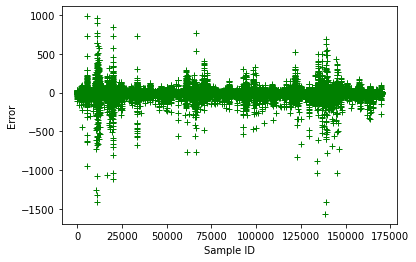

DescribeResult(nobs=170144, minmax=(array([1.0728836e-06], dtype=float32), array([1567.6682], dtype=float32)), mean=array([7.342424], dtype=float32), variance=array([682.13824], dtype=float32), skewness=array([18.268946], dtype=float32), kurtosis=array([572.2012], dtype=float32))

In [54]:
test_predict = model.predict(test_features)

error,abserror = errorCalculate(test_Y,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [55]:
model.save("C:/Users/xuxia/2020F-Project/Covid-19")

INFO:tensorflow:Assets written to: C:/Users/xuxia/2020F-Project/Covid-19\assets


In [56]:
model_upload = load_model("C:/Users/xuxia/2020F-Project/Covid-19")

In [57]:
model_upload.predict(test_X)

array([[2.451274 ],
       [2.6094155],
       [2.707106 ],
       ...,
       [8.357125 ],
       [8.572607 ],
       [8.637398 ]], dtype=float32)

In [58]:
test_Y

array([0, 2, 0, ..., 0, 8, 7], dtype=int64)